# Analysis of the paths 


The analysis is made under the assumption that people are doing their best when playing.
- Extraction of the length of the paths
    - TO DO:
        - Reduce computational power (Hashing, code improvement,...) 
            
            
- Reproduction of the optimal path, or inspiration or use of https://www.sixdegreesofwikipedia.com/
    - TO DO: (This task is going to be the thoughest, seems quite difficult but feasible.)
        - Implement a local version of the website (Many optimal paths possible)
            - Creation of the SQLITE database
            - Running of the local website 
        
        
- Comparison to the optimal one (Most important part of the analysis) 
    - TO DO: (Once optimal paths are found) 
        - Apply the comparison, extract the deviations from the optimal path (From the results of other group members analysis
            - From deviations, towards which category / concepts / words are people drawn ? Link with the influence of the environment.
            - By which factor are people biased ? 
            - From optimal paths, which category contains the most informations / is the most useful to get the fastest ? 
            - Apply to optimal paths, which category contains the most informations ? Link with position of the links

### Goals of P2
- Get acquainted with data
- preprocess it
- complete descriptive statistics tasks 
***
### Expectations
- Pipeline in place
- Documentend notebook
- Show clear project goals
### Exemples of what we should show: 
- That you can handle the data in its size.
- That you understand what’s in the data (formats, distributions, missing values, correlations, etc.).
- That you considered ways to enrich, filter, transform the data according to your needs.
- That you have a reasonable plan and ideas for methods you’re going to use, giving their essential mathematical details in the notebook.
- That your plan for analysis and communication is reasonable and sound, potentially discussing alternatives to your choices that you considered but dropped.

        

In [2]:
#Import of the library
import numpy as np
import urllib.parse
import matplotlib.pyplot as plt 

import pandas as pd 
from tqdm import trange
import pickle as pkl
import pandas as pd 

## Data Wrangling
***
### Matrix of shortest path
In order to compare average users paths with the optimal ones.

In [3]:
#%%timeit -r 1 -n 1

# Function to write the matrix in an annex file, to save some time 
def shortest_path_matrix_writing():
    number_of_words = 4604 #Given data
    with open("wikispeedia_paths-and-graph/shortest-path-distance-matrix.txt", "r") as f:
        shortest_distance_matrix = np.zeros((number_of_words,number_of_words))
        for i in range(17):
            f.readline()
        for i, line in enumerate(f) :
            line = line.strip('\n')
            for j, number in enumerate(line):
                if number == '_': #replacing impossible paths with nans
                    number = np.nan
                else:
                    number = int(number)
                shortest_distance_matrix[i,j] = number
    np.save("data/shortest_distance_matrix", shortest_distance_matrix)
    return 


In [4]:
shortest_distance_matrix = np.load("data/shortest_distance_matrix.npy")
number_of_words = 4604

Following initial analysis

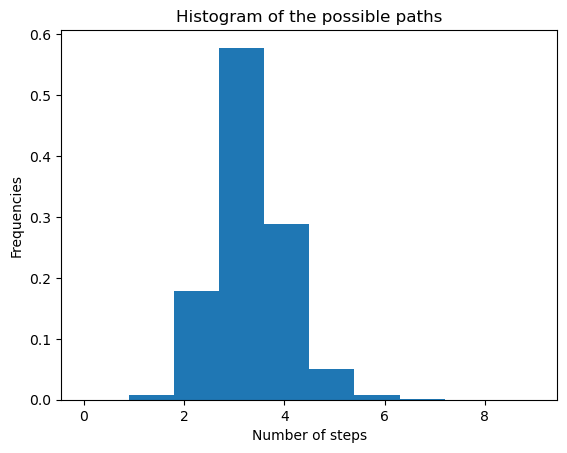

Mean of shortest paths: 3.2
Median: 3.2
Frequence of impossible paths: 0.12 


In [5]:
d1_shortest_matrix = np.reshape(shortest_distance_matrix ,-1)
plt.hist(d1_shortest_matrix, bins = 10, density = True)
plt.xlabel("Number of steps")
plt.ylabel("Frequencies")
plt.title("Histogram of the possible paths")
plt.show()
print("Mean of shortest paths: %.1f" % (np.mean(d1_shortest_matrix[~np.isnan(d1_shortest_matrix)])))
print("Median: %.1f" % np.mean(d1_shortest_matrix[~np.isnan(d1_shortest_matrix)]))
print("Frequence of impossible paths: %.2f " %
      (len(d1_shortest_matrix[np.isnan(d1_shortest_matrix)])/len(d1_shortest_matrix)))

### Articles dataset
In order to associate path with names as the shortest path matrix in the same order as articles.

We use the library urllib.parse in order to decode from URL.

By using %%timeit, we notice a notable time difference in execution time when decoding from URL. 

We decide not to decode it straightaway but only when it is necessary (when we need to know the name of the article) as it is for now not necessary to decode the URL encoding for the names of the articles. 

In [6]:
#%%timeit -r 1 -n 1

with open("wikispeedia_paths-and-graph/articles.tsv", "r", newline = '\n') as f:
    articles = [None]*number_of_words
    articles_decoded = [None]*number_of_words
    for i in range(12):
        f.readline()
    for i, line in enumerate(f):
        articles_decoded[i] = urllib.parse.unquote(line.strip('\n').replace('_', ' ')) #Decoding 
        articles[i] = line.strip('\n')

In [7]:
count = 0
for i in range(number_of_words):
    if articles[i] != articles_decoded[i]:
        count += 1
print("Fraction of the encoded words: %.2f" % (count/number_of_words))
    

Fraction of the encoded words: 0.62


### Website testing
We make tests to see if the website is in adequation with our datas.
https://www.sixdegreesofwikipedia.com/

In [8]:
a= np.where(shortest_distance_matrix==8)
b = np.where(np.isnan(shortest_distance_matrix))
print("Example of article where minimum distance == 8")
print(articles[a[7][7]])
print(articles[a[1][7]])
print("\n")
print("Example of article where minimum distance doesn't exist")
print(articles[b[0][-1]])
print(articles[b[1][-1]])


Example of article where minimum distance == 8
16_Cygni
Timken_1111


Example of article where minimum distance doesn't exist
Zulu
Zara_Yaqob


For both of those examples, the website finds examples that are either shorter or existant. This makes sense as our datas are  only constituted of ~4600 articles, whereas theirs of ~6 million articles. 

One option is to reproduce the website code based on our datas.
- https://github.com/jwngr/sdow/blob/master/.github/CONTRIBUTING.md
- https://github.com/jwngr/sdow/blob/master/docs/data-source.md
- https://github.com/jwngr/sdow/blob/master/scripts/create_mock_databases.py

Based on the above links this option seems very plausible. 

A second option is to create our own optimal path algorithm.

***

***
### Categories data
In order to infer a categorie favored by the players.

Many articles have several categories, some have none. 

There's 129 categories

Max is subject.Countries with 229
Min is subject.Art.Artists with 2
Median is at 27
Mean is at 40
Categories ranked by number of article they contain:

                                                    article
category                                                   
subject.Countries                                       229
subject.Science.Biology.Birds                           161
subject.Geography.Geography_of_Great_Britain            124
subject.Science.Chemistry.Chemical_elements             119
subject.Science.Biology.Mammals                         114
...                                                     ...
subject.Geography.Antarctica                              8
subject.People.Chemists                                   8
subject.People.Producers_directors_and_media_fi...        8
subject.IT.Cryptography                                   6
subject.Art.Artists                                       2

[129 rows x 1 columns]


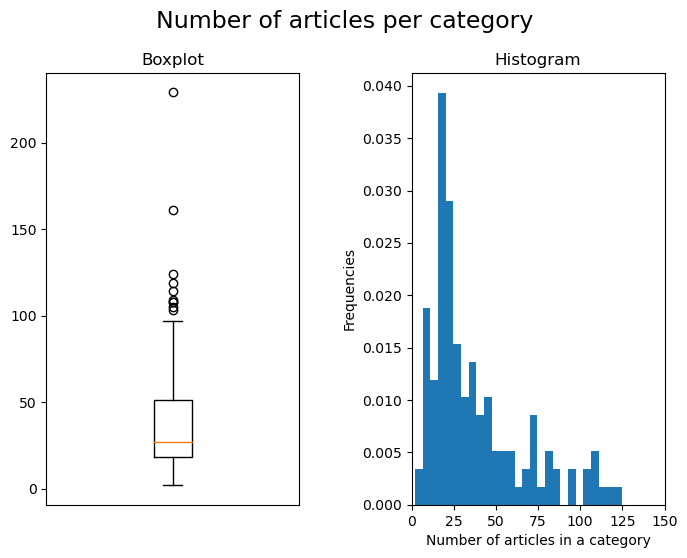

In [9]:
categories = pd.read_csv("wikispeedia_paths-and-graph/categories.tsv",
                         sep = '\t', skiprows = 13, names = ['article', 'category'])
#print(nb_by_cat)

nb_by_cat = categories.groupby('category').count()
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize= (8,6))
fig.tight_layout(pad = 5)
fig.suptitle('Number of articles per category', fontsize = 17)

ax[1].hist(nb_by_cat, bins = 50, density = True)
ax[0].boxplot(nb_by_cat)
ax[1].set_title("Histogram")
ax[0].set_title("Boxplot")
ax[1].set_xlabel('Number of articles in a category')
ax[1].set_ylabel('Frequencies')
ax[0].set_xticks([])
ax[1].set_xlim([0,150])

print("There's %d categories\n" % len(nb_by_cat))
print("Max is %s with %d\nMin is %s with %d\nMedian is at %d\nMean is at %d" % 
      (nb_by_cat['article'].idxmax(), max(nb_by_cat['article']),nb_by_cat['article'].idxmin(), 
       min(nb_by_cat['article']),nb_by_cat['article'].median(), nb_by_cat['article'].mean()))

pd.set_option('display.max_rows', 10)
print("Categories ranked by number of article they contain:\n")
print(nb_by_cat.sort_values('article', ascending = False))

***
### Paths data 
In order to analyze the players behaviour (only finished paths)

In [10]:
paths_finished = pd.read_csv("wikispeedia_paths-and-graph/paths_finished.tsv", 
                             sep = '\t', skiprows = 16, usecols = [3], names = ['paths'])

#### Hashing implementation

In order to reduce the computation time of the analysis of the paths, hashing could be interessant.

This step is ignored for now, might be implemented later.


In [11]:
## HASHING 
#To be finished
def hash_function(key):
    return sum(index * ord(character) for index, character in enumerate(repr(key), start=1))

print(articles[1000])
print(hash_function(articles[1000]))
print(articles[2500])
print(hash_function(articles[2500]))


Community
6482
List_of_U.S._states_by_date_of_statehood
90370


### Analysis of the paths

When we look for certains user's paths length average, we want to get the index of the intial and final words to obtain the comparison with optimal length. 

Assuming we ignore when they go back.

The words need to be accessible for later

In [12]:
#### While hashing is not finished, we save the results ouf our initial analysis in order to get them instantly.

def paths_pickled(step):
    
    header = ['index_initial', 'index_final','length_path','length_path_bs','path', 'path_backslash']
    paths_unpacked = pd.DataFrame(columns = header, dtype = object)
    
    for j in trange(0,len(paths_finished),step):
        
        each_word_bs = paths_finished['paths'][j].split(';')
        path_bs_length = len(each_word_bs)
        each_word = paths_finished['paths'][j].replace('<;', '').split(';') # .replace() to ignore when they go back
        
        path_length = len(each_word)
        index_initial = articles.index(each_word[0])
        index_final  = articles.index(each_word[-1])
        
        to_df = [index_initial, index_final, path_length, path_bs_length, each_word, each_word_bs]
        
        paths_unpacked.loc[j] = to_df
        
    paths_unpacked.to_pickle("data/paths_dataframe.pkl")
        
    return 



    #print("Beginning: %s \t End: %s" % (each_word[0], each_word[-1]))
    #print("Length of the path: %15d" % int(len(each_word)))
    #print("Length of the optimal path: %7d"  % shortest_distance_matrix[index_initial, index_final])

In [13]:
paths_unpacked = pd.read_pickle("data/paths_dataframe.pkl")
paths_unpacked

,index_initial,index_final,length_path,length_path_bs,path,path_backslash
0,10,143,9,9,"[14th century, 15th century, 16th century, Pac...","[14th century, 15th century, 16th century, Pac..."
1,10,143,5,5,"[14th century, Europe, Africa, Atlantic slave ...","[14th century, Europe, Africa, Atlantic slave ..."
2,10,143,8,8,"[14th century, Niger, Nigeria, British Empire,...","[14th century, Niger, Nigeria, British Empire,..."
3,10,1793,4,4,"[14th century, Renaissance, Ancient Greece, Gr...","[14th century, Renaissance, Ancient Greece, Gr..."
4,10,2266,7,7,"[14th century, Italy, Roman Catholic Church, H...","[14th century, Italy, Roman Catholic Church, H..."
...,...,...,...,...,...,...
51313,4558,928,3,3,"[Yagan, Ancient Egypt, Civilization]","[Yagan, Ancient Egypt, Civilization]"
51314,4558,1500,8,9,"[Yagan, Folklore, Brothers Grimm, 19th century...","[Yagan, Folklore, Brothers Grimm, 19th century..."
51315,4558,4273,7,7,"[Yagan, Australia, England, France, United Sta...","[Yagan, Australia, England, France, United Sta..."
51316,4562,97,4,4,"[Yarralumla%2C Australian Capital Territory, A...","[Yarralumla%2C Australian Capital Territory, A..."


Here's a few example of the differences between the length of the optimal path and the length of the player path

In [14]:
for i in range(0,51500,15000):
    print("Length of the path played: %d \nLength of the optimal path: %d\n Difference of: %d\n" 
          % (paths_unpacked['length_path'][i],shortest_distance_matrix[paths_unpacked['index_initial'][i]][paths_unpacked['index_final'][i]],
            paths_unpacked['length_path'][i]-shortest_distance_matrix[paths_unpacked['index_initial'][i]][paths_unpacked['index_final'][i]]))

Length of the path played: 9 
Length of the optimal path: 3
 Difference of: 6

Length of the path played: 7 
Length of the optimal path: 3
 Difference of: 4

Length of the path played: 13 
Length of the optimal path: 3
 Difference of: 10

Length of the path played: 9 
Length of the optimal path: 3
 Difference of: 6



Descriptive statistics of the finished_paths datas

Max:   420.0
Mean:    6.4
Median:  6.0
Median:  6.0


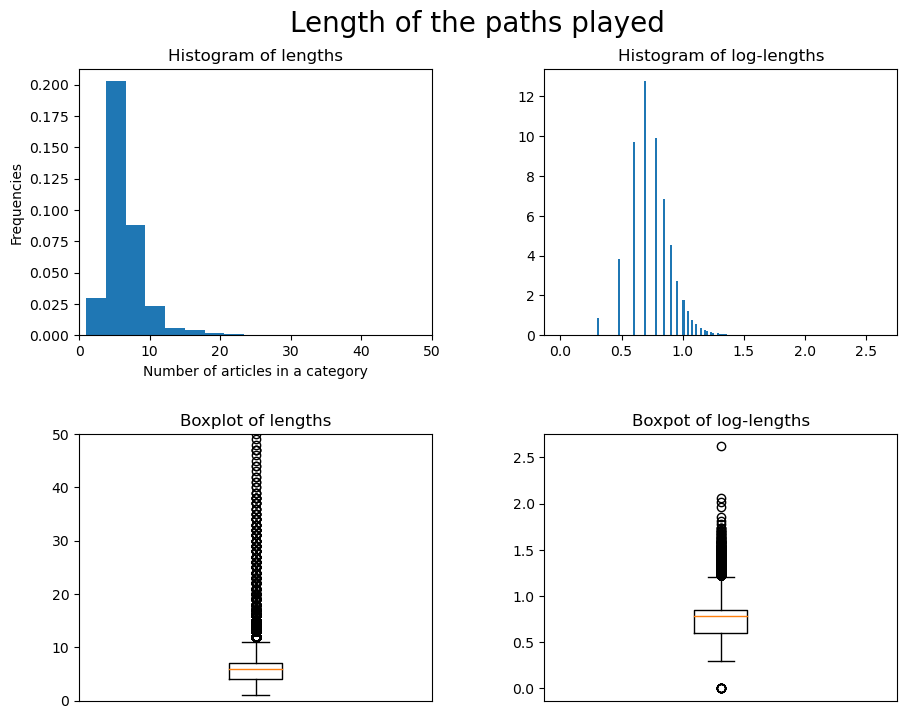

In [15]:
path_lengths = paths_unpacked['length_path']
path_lengths_bs = paths_unpacked['length_path_bs']

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize= (10, 8))
fig.tight_layout(pad = 5)
fig.suptitle('Length of the paths played', fontsize = 20)


ax[0,0].hist(path_lengths, bins = 150, density = True)
ax[0,1].hist(np.log10(paths_unpacked['length_path'].astype(float)), bins = 150, density = True )
ax[1,0].boxplot(path_lengths)
ax[1,1].boxplot(np.log10(paths_unpacked['length_path'].astype(float)))
ax[0,0].set_title("Histogram of lengths")
ax[0,1].set_title("Histogram of log-lengths")
ax[1,0].set_title("Boxplot of lengths")
ax[1,1].set_title("Boxpot of log-lengths")

ax[0,0].set_xlim([0,50])
ax[1,0].set_ylim([0,50])
ax[0,0].set_xlabel('Number of articles in a category')
ax[0,0].set_ylabel('Frequencies')
ax[1,0].set_xticks([])
ax[1,1].set_xticks([]);

print("Max: % 7.1f" % max(path_lengths))
print("Mean: %6.1f" % path_lengths.mean())
print("Median: %4.1f" % path_lengths.median())
print("Median: %4.1f" % path_lengths_bs.median())



From this initial analysis, it seems players use 3 more clicks in average than optimal paths

***
## Following steps

Once the optimal paths are found, we will be able to establish a comparison between the optimal and the played paths. 

Everytime a player plays a move that make the paths get 1 step longer, we will consider it a 'sub-optimal' decision and try to find a explanation from the different factors studied. For example: a decision induced by an external event, or the position of the links in the page.

The analysis will be carried on the word inducing the 'sub-optimal' decision by analyzing it's charachteristics (what categories of links are present on the page, their respective position, the numbers of game played (win/loose) played before,...) 

In [16]:
from collections import deque
import pandas as pd
import networkx as nx

In [17]:
links_in_pages = pd.read_pickle('data/links_in_pages_DF.pkl')
lip = links_in_pages.drop_duplicates(subset = ['page', 'link'])

lip = lip[['page', 'link']]
data_grouped = lip.groupby("page")
# Create a dictionary from each group, with the page name as the key
data_dict = data_grouped.apply(lambda x: {x.name: x["link"].tolist()})

dict_data = {}
for key in data_dict:
    dict_data.update(key)



In [18]:
titles = lip['page'].unique()
titles

array(['Áedán mac Gabráin', 'Åland', 'Édouard Manet', ..., 'Zuid-Gelders',
       'Zulu', 'ZX Spectrum'], dtype=object)

In [19]:
D = nx.DiGraph()
D.add_nodes_from(dict_data.keys())

for key in dict_data.keys():
    for item in dict_data[key]:
        D.add_edge(key, item)

print(D)

DiGraph with 13235 nodes and 132815 edges


In [20]:
if nx.has_path(D,'Áedán mac Gabráin', 'Bob Marley'):
    test = nx.all_shortest_paths(D, 'Áedán mac Gabráin', 'Bob Marley')
    paths = [p for p in test]
    print('there are %s shortest paths of lenght %s, and one one them is \n %s'% (len(paths), len(paths[0]), paths[0]))
else: print('no path')

there are 10 shortest paths of lenght 5, and one one them is 
 ['Áedán mac Gabráin', 'Scotland', 'England', 'Drum and bass', 'Bob Marley']


In [21]:
nx.write_gexf(D, ('data/page_graphs.gexf'))

In [22]:
for i in range(10):
    #print("\nSource: %s\nTarget: %s" % (articles_decoded[paths_unpacked.values[i][0]], articles_decoded[paths_unpacked.values[i][1]]))
    if nx.has_path(D,articles_decoded[paths_unpacked.values[i][0]], articles_decoded[paths_unpacked.values[i][1]]):
        test = nx.all_shortest_paths(D, articles_decoded[paths_unpacked.values[i][0]], articles_decoded[paths_unpacked.values[i][1]])
        paths = [p for p in test]
        #print(paths)
        #print(np.random.randint(0, len(paths)))
        #print('there are %s shortest paths of length %s, and one one them is \n %s'% (len(paths), len(paths[0]), paths[np.random.randint(0, len(paths))]))
        
    else: 
        print('no path')

In [124]:
#Example

test = nx.all_shortest_paths(D, articles_decoded[paths_unpacked['index_initial'][8]], articles_decoded[paths_unpacked['index_final'][8]])
paths = [p for p in test]
print(paths)

print(paths_unpacked['path'][8])

for p in paths:
    print([click in p for click in paths_unpacked['path'][8]])
    for click in p:
        if click in paths_unpacked['path'][8]:
            click = True
        else:
            print("Wrong word: %s" % click)
            break 


[['14th century', '15th century', 'Wars of the Roses', 'Rainbow'], ['14th century', 'Edward III of England', 'Wars of the Roses', 'Rainbow'], ['14th century', 'England', 'Wars of the Roses', 'Rainbow'], ['14th century', 'Time', 'Isaac Newton', 'Rainbow'], ['14th century', 'Time', 'Light', 'Rainbow']]
['14th century', 'Time', 'Light', 'Rainbow']
[True, False, False, True]
Wrong word: 15th century
[True, False, False, True]
Wrong word: Edward III of England
[True, False, False, True]
Wrong word: England
[True, True, False, True]
Wrong word: Isaac Newton
[True, True, True, True]


In [132]:
def errors_to_pickle(step):
    error_df = pd.DataFrame(columns = ['step_error', 'page', 'click sub_optimal ', 'opt'])

    for i in range(step):
        algorithm = nx.all_shortest_paths(D, articles_decoded[paths_unpacked['index_initial'][i]], articles_decoded[paths_unpacked['index_final'][i]])
        paths = [p for p in algorithm]
        optimal_choices_missed = []
        if len(paths_unpacked['path'][i]) == len(paths[0]):
                continue
        mistake = 0
        for index, click in enumerate(paths_unpacked['path'][i]):
            if mistake:
                break 
            for p in paths:
                if click == p[index]:
                    
                    mistake = 0
                    optimal_choices_missed = []
                    clicked_wrongly = None
                    break
                else:
                    paths.remove(p)
                    optimal_choices_missed.append(p[index])
                    mistake = 1
                    clicked_wrongly = click
                    index_error = index

        error_df.loc[i] = [index_error, paths_unpacked['path'][i][index_error-1], clicked_wrongly, list(set(optimal_choices_missed))]
    return error_df
error_df = errors_to_pickle(30)
error_df
#error_df.to_pickle('data/error_dataframe.pkl')

,step_error,page,click sub_optimal,opt
0,1,14th century,15th century,"[Lithuania, Pope]"
1,1,14th century,Europe,"[Lithuania, Pope]"
2,1,14th century,Niger,"[Lithuania, Pope]"
3,1,14th century,Renaissance,"[Washington, D.C., Ottoman Empire, Europe]"
4,2,Italy,Roman Catholic Church,"[President of the United States, Cold War, Ber..."
5,2,Europe,North America,"[Winston Churchill, Cold War, United States, M..."
7,2,Time,Isaac Newton,"[Wars of the Roses, Light]"
9,2,15th century,Plato,"[Wars of the Roses, Light]"
10,2,Time,Science,"[Wars of the Roses, Light]"
11,1,14th century,Christianity,"[15th century, Time, England]"


In [ ]:
#error_df = pd.read_pickle('data/error_dataframe.pkl')

In [105]:
paths_unpacked[0:10]


,index_initial,index_final,length_path,length_path_bs,path,path_backslash
0,10,143,9,9,"[14th century, 15th century, 16th century, Pac...","[14th century, 15th century, 16th century, Pac..."
1,10,143,5,5,"[14th century, Europe, Africa, Atlantic slave ...","[14th century, Europe, Africa, Atlantic slave ..."
2,10,143,8,8,"[14th century, Niger, Nigeria, British Empire,...","[14th century, Niger, Nigeria, British Empire,..."
3,10,1793,4,4,"[14th century, Renaissance, Ancient Greece, Gr...","[14th century, Renaissance, Ancient Greece, Gr..."
4,10,2266,7,7,"[14th century, Italy, Roman Catholic Church, H...","[14th century, Italy, Roman Catholic Church, H..."
5,10,2266,6,6,"[14th century, Europe, North America, United S...","[14th century, Europe, North America, United S..."
6,10,1511,4,4,"[14th century, China, Gunpowder, Fire]","[14th century, China, Gunpowder, Fire]"
7,10,3425,6,6,"[14th century, Time, Isaac Newton, Light, Colo...","[14th century, Time, Isaac Newton, Light, Colo..."
8,10,3425,4,4,"[14th century, Time, Light, Rainbow]","[14th century, Time, Light, Rainbow]"
9,10,3425,7,7,"[14th century, 15th century, Plato, Nature, Ul...","[14th century, 15th century, Plato, Nature, Ul..."


In [25]:
paths_unpacked.groupby(['index_initial', 'index_final']).count().groupby(['length_path']).count()

,length_path_bs,path,path_backslash
length_path,,,
1,20060,20060,20060
2,4798,4798,4798
3,1911,1911,1911
4,866,866,866
5,420,420,420
...,...,...,...
148,1,1,1
642,1,1,1
905,1,1,1


In [82]:
paths_unpacked

,index_initial,index_final,length_path,length_path_bs,path,path_backslash
0,10,143,9,9,"[14th century, 15th century, 16th century, Pac...","[14th century, 15th century, 16th century, Pac..."
1,10,143,5,5,"[14th century, Europe, Africa, Atlantic slave ...","[14th century, Europe, Africa, Atlantic slave ..."
2,10,143,8,8,"[14th century, Niger, Nigeria, British Empire,...","[14th century, Niger, Nigeria, British Empire,..."
3,10,1793,4,4,"[14th century, Renaissance, Ancient Greece, Gr...","[14th century, Renaissance, Ancient Greece, Gr..."
4,10,2266,7,7,"[14th century, Italy, Roman Catholic Church, H...","[14th century, Italy, Roman Catholic Church, H..."
...,...,...,...,...,...,...
51313,4558,928,3,3,"[Yagan, Ancient Egypt, Civilization]","[Yagan, Ancient Egypt, Civilization]"
51314,4558,1500,8,9,"[Yagan, Folklore, Brothers Grimm, 19th century...","[Yagan, Folklore, Brothers Grimm, 19th century..."
51315,4558,4273,7,7,"[Yagan, Australia, England, France, United Sta...","[Yagan, Australia, England, France, United Sta..."
51316,4562,97,4,4,"[Yarralumla%2C Australian Capital Territory, A...","[Yarralumla%2C Australian Capital Territory, A..."
